## Data Preprocessing

 #### Make Label Data

In [9]:
import cv2
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
data_csv = pd.read_csv("./data_csv.csv")
data_analyse = data_csv.loc[5366, :]

In [11]:
def get_x_new(x_raw):
    if x_raw != "0":
        x_raw = x_raw.split()
        for item in range(len(x_raw)):
            x_raw[item] = int(x_raw[item])
        x_raw_1 = x_raw[::2]
        x_raw_2 = x_raw[1::2]
        x_new = []
        for item in range(len(x_raw_1)):
            for item_index in range(x_raw_2[item]):
                x_new.append(x_raw_1[item] + item_index)
    else:
        x_new = [0]
    return x_new

In [34]:
def get_new_where(x, h):
    if x != [0]:
        y = np.zeros([len(x), 2])
        for i in range(len(x)):
            y[i, 0] = x[i] // h
            y[i, 1] = x[i] % h
        return y
    else:
        return None

In [33]:
def get_label(image, segmentation_s, segmentation_sb, segmentation_lb):
    segmentation_lb = get_new_where(get_x_new(segmentation_lb), image.shape[0])
    segmentation_sb = get_new_where(get_x_new(segmentation_sb), image.shape[0])
    segmentation_s = get_new_where(get_x_new(segmentation_s), image.shape[0])
    transparent = np.zeros([image.shape[0], image.shape[0], 1], dtype=image.dtype)
    if segmentation_lb is not None:
        for j in range(segmentation_lb.shape[0]):
            transparent[int(segmentation_lb[j, 0]), int(segmentation_lb[j, 1]), 0] = 50
    if segmentation_sb is not None:
        for j in range(segmentation_sb.shape[0]):
            transparent[int(segmentation_sb[j, 0]), int(segmentation_sb[j, 1]), 0] = 125
    if segmentation_s is not None:
        for j in range(segmentation_s.shape[0]):
            transparent[int(segmentation_s[j, 0]), int(segmentation_s[j, 1]), 0] = 200
    return transparent

In [14]:
def gamma_trans(img, gamma):
	gamma_table = [np.power(x/255.0,gamma)*255.0 for x in range(256)]
	gamma_table = np.round(np.array(gamma_table)).astype(np.uint8)
	return cv2.LUT(img,gamma_table)

In [30]:
png = cv2.imread(data_analyse['path'])
png = gamma_trans(png, math.log10(0.5)/math.log10(np.mean(png)/255))

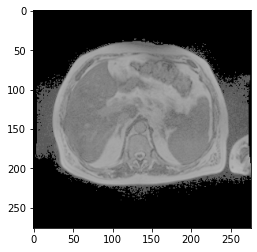

In [31]:
plt.imshow(cv2.cvtColor(png, cv2.COLOR_BGRA2RGB))

(276, 276, 1)


True

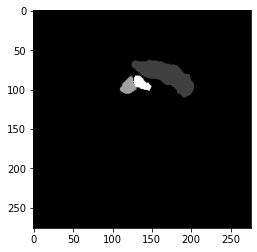

In [40]:
png_label = get_label(png, data_analyse['segmentation_s'], data_analyse['segmentation_sb'], data_analyse['segmentation_lb'])
print(png_label.shape)
plt.imshow(png_label, cmap ='gray')
cv2.imwrite("./data/png_label.png", png_label)

True


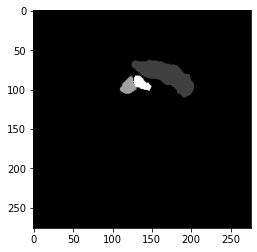

In [44]:
png_label_new = np.expand_dims(cv2.imread("./data/png_label.png", cv2.IMREAD_GRAYSCALE), axis=-1)
print((png_label_new == png_label).all())
plt.imshow(png_label, cmap ='gray')

In [4]:
png = cv2.imread(data_csv.loc[5366, "path"])
png = gamma_trans(png, math.log10(0.5)/math.log10(np.mean(png)/255))

(276, 276, 3)


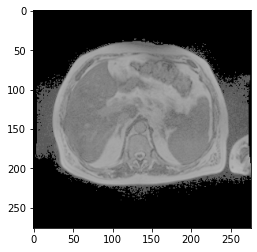

In [10]:
print(png.shape)
png = cv2.cvtColor(png, cv2.COLOR_BGRA2RGB)
plt.imshow(png)
print(png)